## Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
### R&D Spend -- Research and devolop spend in the past few years
### Administration -- spend on administration in the past few years
### Marketing Spend -- spend on Marketing in the past few years
### State -- states from which data is collected
### Profit  -- profit of each state in the past few years

### Importing Libraries & Dataset

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Importing Dataset
data=pd.read_csv('C:\\Users\\chaud\\Downloads\\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Performing EDA

In [3]:
data.info()
#No Null values detected & correct data types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Feature Engineering - Renaming columns
Startups = data.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MKTS'},axis=1)
Startups.head()

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Checking for duplicates
Startups[Startups.duplicated()] 
# No duplicated data

,RDS,Admin,MKTS,State,Profit


<AxesSubplot:xlabel='RDS'>

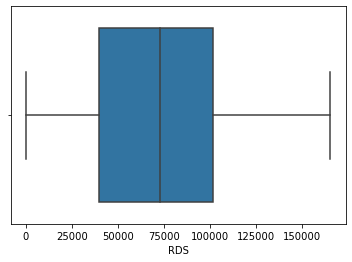

In [7]:
# Checking for Outliers
sns.boxplot(x = Startups.RDS)

<AxesSubplot:xlabel='Admin'>

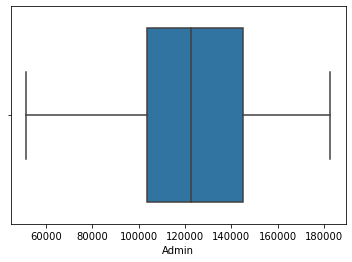

In [8]:
sns.boxplot(x = Startups.Admin)

<AxesSubplot:xlabel='MKTS'>

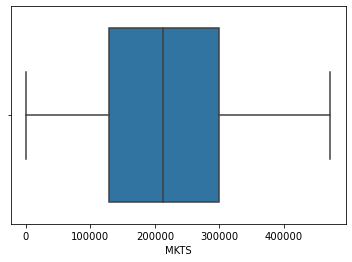

In [9]:
sns.boxplot(x = Startups.MKTS)

<AxesSubplot:xlabel='Profit'>

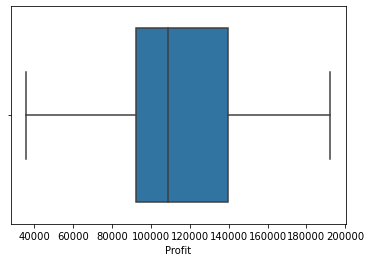

In [26]:
sns.boxplot(x = Startups.Profit)

In [25]:
# Profit column have an outlier
# Replcing outlier with mean
Startups["Profit"]=np.where(Startups["Profit"]<25000, Startups.Profit.mean(), Startups["Profit"])

### Correlation Analysis

<AxesSubplot:>

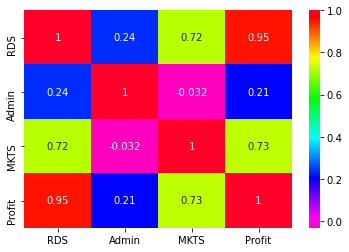

In [34]:
sns.heatmap(Startups.corr(), annot = True, cmap="gist_rainbow_r")

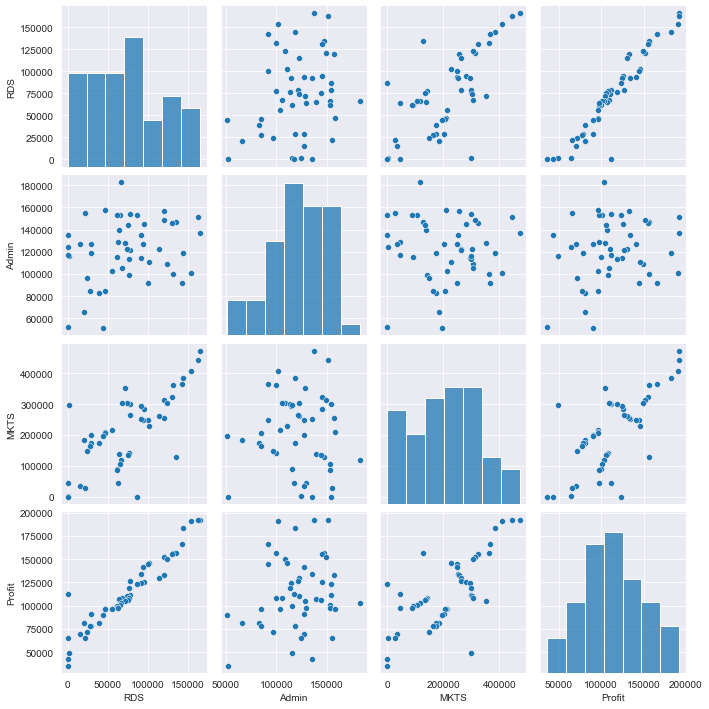

In [35]:
sns.set_style(style='darkgrid')
sns.pairplot(Startups)

### Model Building

In [36]:
Model=smf.ols("Profit~RDS+Admin+MKTS",data=Startups).fit()

### Model Testing

In [37]:
# Finding Coefficient parameters
Model.params

Intercept    56192.005211
RDS              0.744720
Admin           -0.014424
MKTS             0.021872
dtype: float64

In [44]:
# Finding tvalues and pvalues
print("tvalues are: ", np.round(Model.tvalues, 5) ,"\n""pvalues are: ", np.round(Model.pvalues, 5))

tvalues are:  Intercept     6.82212
RDS          13.16216
Admin        -0.22554
MKTS          1.06086
dtype: float64 
pvalues are:  Intercept    0.00000
RDS          0.00000
Admin        0.82256
MKTS         0.29429
dtype: float64


In [46]:
# Finding rsquared values
print("rsquared value: ", Model.rsquared , "\n""rsquared adjusted value: ", Model.rsquared_adj)  
# Model accuracy is 90.62%

rsquared value:  0.9119537155310937 
rsquared adjusted value:  0.9062115665439912


In [47]:
# Building SLR and MLR models for insignificant variables 'Admins' and 'MKTS'
# And finding their tvalues and pvalues

In [52]:
slr_Admin = smf.ols("Profit~Admin",data=Startups).fit()
print("tvalue: ", slr_Admin.tvalues, "\n""pvalue: ", slr_Admin.pvalues)  
# Admins has in-significant pvalue

tvalue:  Intercept    3.385444
Admin        1.458122
dtype: float64 
pvalue:  Intercept    0.001425
Admin        0.151319
dtype: float64


In [54]:
slr_MKTS = smf.ols("Profit~MKTS",data=Startups).fit()
print("tvalue: ", slr_MKTS.tvalues, "\n""pvalue: ", slr_MKTS.pvalues)
# MKTS has significant pvalue

tvalue:  Intercept    8.93295
MKTS         7.32360
dtype: float64 
pvalue:  Intercept    8.901985e-12
MKTS         2.350323e-09
dtype: float64


In [55]:
mlr_Admin_MKTS = smf.ols("Profit~Admin+MKTS",data=Startups).fit()
print("tvalue: ", mlr_Admin_MKTS.tvalues, "\n""pvalue: ", mlr_Admin_MKTS.pvalues)  
# varaibles have significant pvalues

tvalue:  Intercept    1.660128
Admin        2.428029
MKTS         7.762082
dtype: float64 
pvalue:  Intercept    1.035472e-01
Admin        1.906352e-02
MKTS         5.782332e-10
dtype: float64


### Model Validation : 1) Collinearity Check & 2) Residual Analysis

In [57]:
# 1) Collinearity Problem Check
# Calculating VIF = 1/(1-Rsquare) for all independent variables

rsq_RDS=smf.ols("RDS~Admin+MKTS",data=Startups).fit().rsquared
vif_RDS=1/(1-rsq_RDS)

rsq_Admin=smf.ols("Admin~RDS+MKTS",data=Startups).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_MKTS=smf.ols("MKTS~RDS+Admin",data=Startups).fit().rsquared
vif_MKTS=1/(1-rsq_MKTS)

# Putting the values in Dataframe format
df={'Variables':['RDS','Admin','MKTS'],'Vif':[vif_RDS,vif_Admin,vif_MKTS]}
Vif_df=pd.DataFrame(df)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Admin,1.175091
2,MKTS,2.326773


In [58]:
# None of the variable has VIF>20, No Collinearity, so considering all varaibles in Regression equation

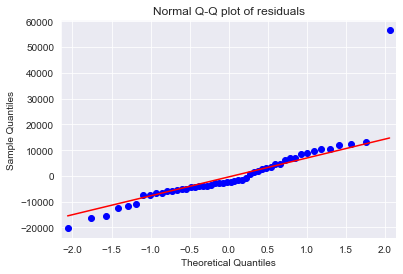

In [59]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(Model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(Model.resid>50000))

[array([49], dtype=int64)]

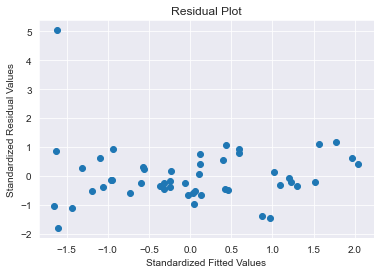

In [64]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - μ)/σ

# Plotting a scatter plot
plt.scatter(standard_values(Model.fittedvalues),standard_values(Model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [65]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

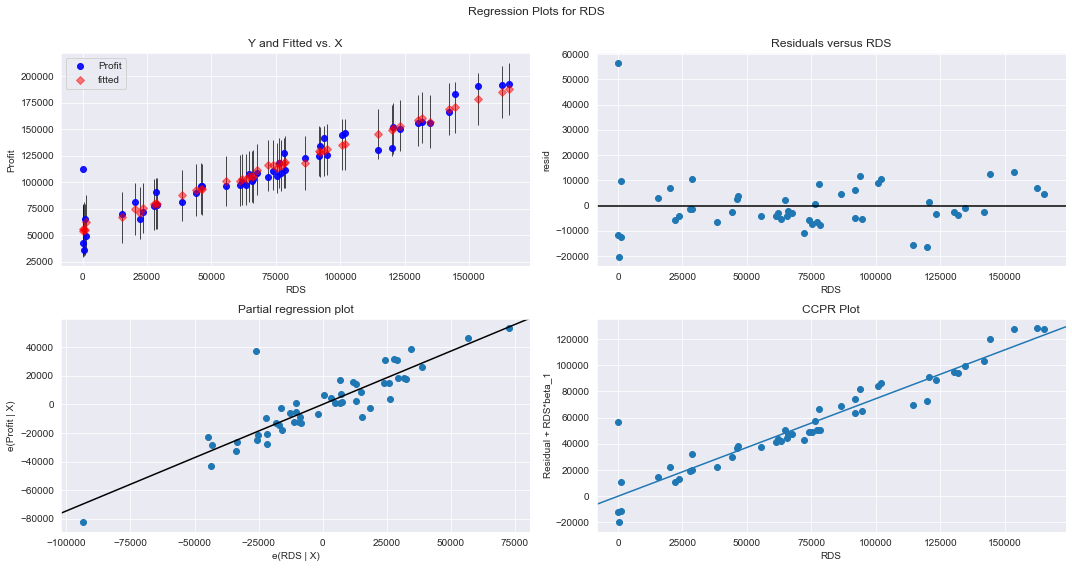

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'RDS',fig=fig)
plt.show()

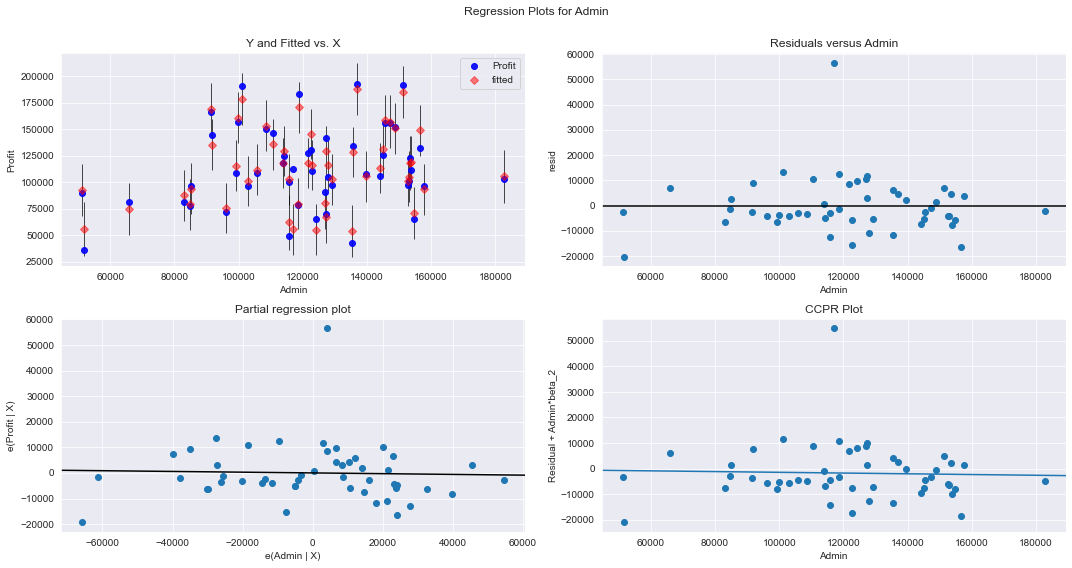

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'Admin',fig=fig)
plt.show()

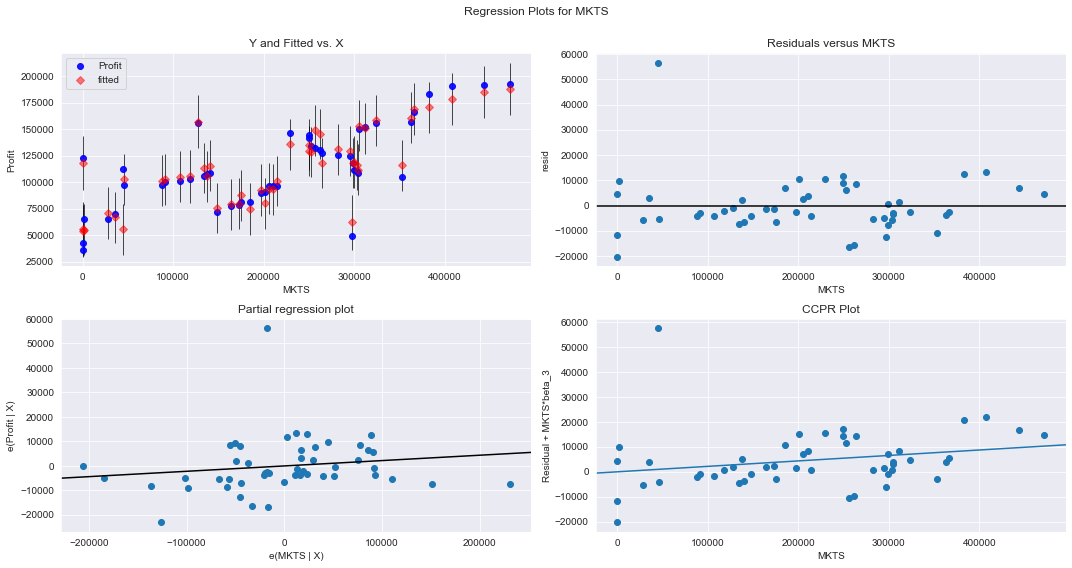

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'MKTS',fig=fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)¶
#### Two Techniques : 1. Cook's Distance & 2. Leverage value¶

In [70]:
# 1. Cook's Distance: 
# If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_) = Model.get_influence().cooks_distance
c

array([6.40525783e-03, 1.46525701e-02, 4.48037939e-02, 2.55958543e-02,
       1.65960998e-03, 2.62493744e-03, 4.59545473e-04, 7.53683502e-04,
       2.90390662e-04, 1.35212301e-03, 9.62418610e-03, 1.10737320e-02,
       6.68070559e-03, 2.00160115e-03, 3.59558169e-02, 1.95825172e-02,
       3.93287031e-03, 2.64173294e-03, 1.56594308e-03, 1.00297641e-02,
       2.93713771e-05, 1.11825182e-02, 3.30468648e-03, 9.21643989e-04,
       6.15535763e-03, 3.00958900e-04, 5.04720535e-03, 2.49148191e-02,
       1.33673159e-03, 2.24506773e-03, 8.54775131e-04, 2.22413153e-03,
       4.79623870e-03, 9.85399278e-04, 2.95713721e-03, 9.06151873e-04,
       1.67135472e-02, 2.66024240e-03, 1.26924793e-02, 5.65179180e-03,
       2.06885632e-04, 3.32771232e-04, 1.93459653e-03, 1.34911543e-03,
       7.85460343e-03, 1.82742177e-02, 1.21912426e-01, 3.00062219e-02,
       2.71031588e-01, 5.21060308e-01])

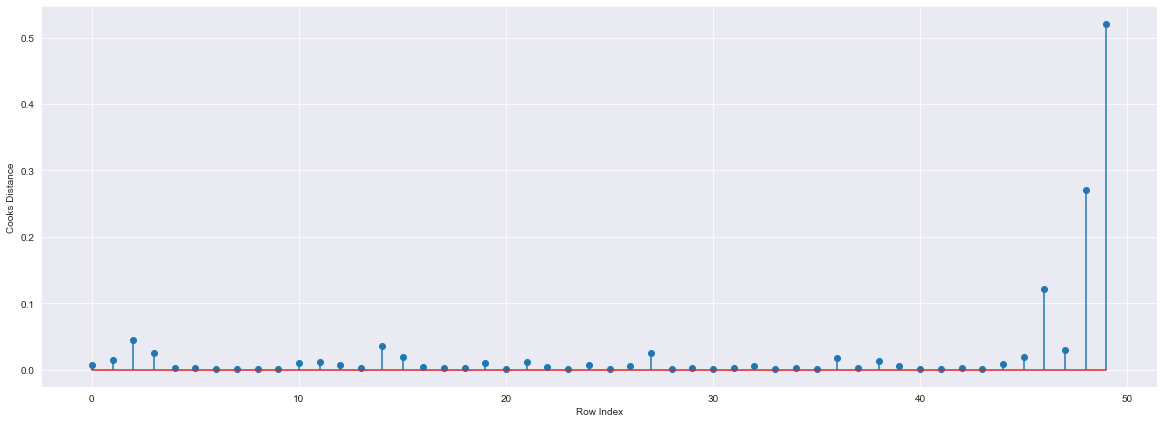

In [71]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Startups)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
# Index and value of influencer where C > 0.5
np.argmax(c) , np.max(c)

(49, 0.5210603082097524)

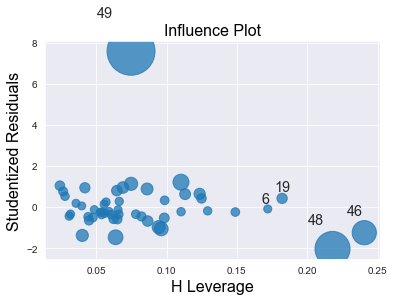

In [73]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(Model)
plt.show()

In [74]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = Startups.shape[1]
n = Startups.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [75]:
# 49th record is an outlier
Startups[Startups.index.isin([49])]

,RDS,Admin,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,112012.6392


### Improving the Model

In [76]:
# Discarding the data point which is influencers and reassign the row number (reset_index(drop=True))
Startups1 = Startups.drop(Startups.index[[49]],axis=0).reset_index(drop=True)
Startups1

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Model Deletion Diagnostics and Final Model

In [78]:
Model2=smf.ols("Profit~RDS+Admin+MKTS",data=Startups1).fit()

In [81]:
while Model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        Model2 = smf.ols("Profit~RDS+Admin+MKTS",data=Startups1).fit()
        (c,_) = Model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Startups1 = Startups1.drop(Startups1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Startups1
    else:
        Final_Model = smf.ols("Profit~RDS+Admin+MKTS",data = Startups1).fit()
        Final_Model.rsquared , Final_Model.aic
        print("Thus model accuracy is improved to: ",Final_Model.rsquared)

Thus model accuracy is improved to:  0.9614129113440602
Thus model accuracy is improved to:  0.962593650298269
Thus model accuracy is improved to:  0.9638487279209415
Thus model accuracy is improved to:  0.9663901957918793
Thus model accuracy is improved to:  0.9706076169779905
Thus model accuracy is improved to:  0.9727840588916423
Thus model accuracy is improved to:  0.9734292907181952
Thus model accuracy is improved to:  0.9785801571833451
Thus model accuracy is improved to:  0.9777383743090916
Thus model accuracy is improved to:  0.9790510088977512
Thus model accuracy is improved to:  0.9790004461890552
Thus model accuracy is improved to:  0.9807878666153609
Thus model accuracy is improved to:  0.9838299343609735
Thus model accuracy is improved to:  0.9831149926392769
Thus model accuracy is improved to:  0.9833768520972176
Thus model accuracy is improved to:  0.9878892536376698
Thus model accuracy is improved to:  0.9877191935547199
Thus model accuracy is improved to:  0.9858356627

In [87]:
print('Final Model Accuracy is: ', np.round(Final_Model.rsquared,4)*100,'%')

Final Model Accuracy is:  98.83 %


### Model Predictions

In [95]:
# Predicting values using given data
pred_y=Final_Model.predict(Startups1)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [94]:
# Predicting using new data
new_data = pd.DataFrame({'RDS':80000,"Admin":100000,"MKTS":110000},index=[0])
new_data

,RDS,Admin,MKTS
0,80000,100000,110000


In [93]:
# Manual Prediction of Price
print('The predicted profit is: ', np.round(Final_Model.predict(new_data),0))

The predicted profit is:  0    110635.0
dtype: float64


### Table of values of r^2 for both Models

In [96]:
d2={'Models':['Model','Final_Model'],'R-squared Value':[Model.rsquared,Final_Model.rsquared]}
table=pd.DataFrame(d2)
table

,Models,R-squared Value
0,Model,0.911954
1,Final_Model,0.988276
